### Importing the required modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statistics as st
import random
import math
from scipy import stats
from IPython.display import Markdown, display

In [2]:
# to turn off the unnecessary warnings generated by pandas
pd.options.mode.chained_assignment = None  # default='warn'

# Print the following string in .md syntax
def printmd(string):
    display(Markdown(string))

In [3]:
df=pd.read_csv('weatherHistory.csv')

# 1. Exploratory data analysis

## a. Description of dataset

### i. Displaying the whole dataset

In [4]:
df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2016-09-01 00:00:00.000 +0200,Clear,rain,16.344444,16.344444,0.60,6.1502,40.0,16.1000,0.0,1022.16,Partly cloudy starting in the morning continui...
1,2016-09-01 01:00:00.000 +0200,Clear,rain,15.788889,15.788889,0.62,6.1019,69.0,16.1000,0.0,1022.05,Partly cloudy starting in the morning continui...
2,2016-09-01 02:00:00.000 +0200,Clear,rain,13.344444,13.344444,0.73,3.2522,56.0,15.1823,0.0,1021.85,Partly cloudy starting in the morning continui...
3,2016-09-01 03:00:00.000 +0200,Clear,rain,12.611111,12.611111,0.75,3.2200,20.0,16.1000,0.0,1021.84,Partly cloudy starting in the morning continui...
4,2016-09-01 04:00:00.000 +0200,Clear,rain,12.038889,12.038889,0.78,0.0000,0.0,16.1000,0.0,1021.84,Partly cloudy starting in the morning continui...
...,...,...,...,...,...,...,...,...,...,...,...,...
715,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
716,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
717,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
718,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


 ### **ii. Description of dataset**

- This dataset consists of the weather records for a month taken with the observations being taken down and noted per hour.

- It consists of various aspects of weather like precipitation, humidity, wind speed, wind bearing, visibility, loud cover, pressure, temperature, apparent temperature against a particular instant of time.

- The summary and the daily summary are noted down appropriately as per the parameters collected.

- Most of the parameters are numerical with the remaining few being categorical.

- The objective of this project is to make optimum use of the dataset to extract maximum and most relevant information out of the dataset for various purposes.

- The first section of the project would consist of descriptive statistics while the second half would contain inferential statistics.

- With the help of the relationships generated between various variables, we can appropriately put this to a great use by inferring various parameters from it.

- While this is just a sample of 720 records, we can easily put this to a great use to infer about various weather parameters on the other given days with optimal accuracy and precision along with minimal margin of error.

### **iii. Meaning of columns in the dataset**

- **Formatted Date:** 
 Denotes the particular time instance

- **Summary:**
 Denotes the summary of the weather for that particular instance of time

- **Precip Type:**
 Indicates the type of precipitation (Categorical variable)

- **Temperature (C):**
 Denotes the absolute temperature in that period of time 

- **Apparent Temperature (C):** 
 Denotes the temperature perceived by humans in that period of time

- **Humidity:** 
 Denotes the humidity in that period of time

- **Wind Speed (km/h):** 
 Denotes the wind speed in that period of time

- **Wind Bearing (degrees):**
 Denotes the compass direction towards which an object is moving because of the wind

- **Visibility (km):**
 Denotes the greatest distance up to which an object can be seen clearly

- **Cloud Cover:**
 Refers to the fraction of the sky covered by the clouds 

- **Pressure (millibars):**
 Denotes the amount of pressure reading as displayed in the barometer

- **Daily Summary:**
 Displays the weather summary for the whole day by implementing appropriate statistical measures across the period of 24 hours

## b. Data cleaning

### i. Handling of missing data by dropping:

In [5]:
#Since the dataset has a column, all of whose values are null, we can drop it, in order to obtain the revised dataset
df1 = df.drop(columns = 'Loud Cover')
df1.dropna()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2016-09-01 00:00:00.000 +0200,Clear,rain,16.344444,16.344444,0.60,6.1502,40.0,16.1000,1022.16,Partly cloudy starting in the morning continui...
1,2016-09-01 01:00:00.000 +0200,Clear,rain,15.788889,15.788889,0.62,6.1019,69.0,16.1000,1022.05,Partly cloudy starting in the morning continui...
2,2016-09-01 02:00:00.000 +0200,Clear,rain,13.344444,13.344444,0.73,3.2522,56.0,15.1823,1021.85,Partly cloudy starting in the morning continui...
3,2016-09-01 03:00:00.000 +0200,Clear,rain,12.611111,12.611111,0.75,3.2200,20.0,16.1000,1021.84,Partly cloudy starting in the morning continui...
4,2016-09-01 04:00:00.000 +0200,Clear,rain,12.038889,12.038889,0.78,0.0000,0.0,16.1000,1021.84,Partly cloudy starting in the morning continui...
...,...,...,...,...,...,...,...,...,...,...,...
715,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,1014.36,Partly cloudy starting in the morning.
716,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,1015.16,Partly cloudy starting in the morning.
717,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,1015.66,Partly cloudy starting in the morning.
718,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,1015.95,Partly cloudy starting in the morning.


### ii. Handling of missing data by imputing:

Imputing by interpolation:

In [6]:
df.interpolate()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2016-09-01 00:00:00.000 +0200,Clear,rain,16.344444,16.344444,0.60,6.1502,40.0,16.1000,0.0,1022.16,Partly cloudy starting in the morning continui...
1,2016-09-01 01:00:00.000 +0200,Clear,rain,15.788889,15.788889,0.62,6.1019,69.0,16.1000,0.0,1022.05,Partly cloudy starting in the morning continui...
2,2016-09-01 02:00:00.000 +0200,Clear,rain,13.344444,13.344444,0.73,3.2522,56.0,15.1823,0.0,1021.85,Partly cloudy starting in the morning continui...
3,2016-09-01 03:00:00.000 +0200,Clear,rain,12.611111,12.611111,0.75,3.2200,20.0,16.1000,0.0,1021.84,Partly cloudy starting in the morning continui...
4,2016-09-01 04:00:00.000 +0200,Clear,rain,12.038889,12.038889,0.78,0.0000,0.0,16.1000,0.0,1021.84,Partly cloudy starting in the morning continui...
...,...,...,...,...,...,...,...,...,...,...,...,...
715,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
716,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
717,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
718,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


### iii. Handling via the best approach (if different from any of the methods mentioned above):

The best approach would be the combination of dropping (the redundant columns) and interpolation (for appropriate numeric columns) for best results:

In [7]:
# note that df1 is the modified form of df0. Changes made: df1 is equivalent to dropping unnecessary and repetitive columns from df0
df1 = df.drop(columns = 'Loud Cover')
df1.dropna()
df1.interpolate()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2016-09-01 00:00:00.000 +0200,Clear,rain,16.344444,16.344444,0.60,6.1502,40.0,16.1000,1022.16,Partly cloudy starting in the morning continui...
1,2016-09-01 01:00:00.000 +0200,Clear,rain,15.788889,15.788889,0.62,6.1019,69.0,16.1000,1022.05,Partly cloudy starting in the morning continui...
2,2016-09-01 02:00:00.000 +0200,Clear,rain,13.344444,13.344444,0.73,3.2522,56.0,15.1823,1021.85,Partly cloudy starting in the morning continui...
3,2016-09-01 03:00:00.000 +0200,Clear,rain,12.611111,12.611111,0.75,3.2200,20.0,16.1000,1021.84,Partly cloudy starting in the morning continui...
4,2016-09-01 04:00:00.000 +0200,Clear,rain,12.038889,12.038889,0.78,0.0000,0.0,16.1000,1021.84,Partly cloudy starting in the morning continui...
...,...,...,...,...,...,...,...,...,...,...,...
715,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,1014.36,Partly cloudy starting in the morning.
716,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,1015.16,Partly cloudy starting in the morning.
717,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,1015.66,Partly cloudy starting in the morning.
718,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,1015.95,Partly cloudy starting in the morning.


### iv. Reasons for the above operations

The main reasons for the above operations is for the sake of removal of unnecessary, unwanted and redundant values which could potentially affect the obtained results thereby making the presented data inefficient and repetitive.

## c. Removal of unwanted observations (duplicate/irrelevant/repetitive)

In [8]:
df1.dropna()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2016-09-01 00:00:00.000 +0200,Clear,rain,16.344444,16.344444,0.60,6.1502,40.0,16.1000,1022.16,Partly cloudy starting in the morning continui...
1,2016-09-01 01:00:00.000 +0200,Clear,rain,15.788889,15.788889,0.62,6.1019,69.0,16.1000,1022.05,Partly cloudy starting in the morning continui...
2,2016-09-01 02:00:00.000 +0200,Clear,rain,13.344444,13.344444,0.73,3.2522,56.0,15.1823,1021.85,Partly cloudy starting in the morning continui...
3,2016-09-01 03:00:00.000 +0200,Clear,rain,12.611111,12.611111,0.75,3.2200,20.0,16.1000,1021.84,Partly cloudy starting in the morning continui...
4,2016-09-01 04:00:00.000 +0200,Clear,rain,12.038889,12.038889,0.78,0.0000,0.0,16.1000,1021.84,Partly cloudy starting in the morning continui...
...,...,...,...,...,...,...,...,...,...,...,...
715,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,1014.36,Partly cloudy starting in the morning.
716,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,1015.16,Partly cloudy starting in the morning.
717,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,1015.66,Partly cloudy starting in the morning.
718,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,1015.95,Partly cloudy starting in the morning.


_______________________________________________________________________________________________________________________________

# 2. Graph visualization

## a. Visualization of dataset to extract meaningful insights

**Pie Chart**

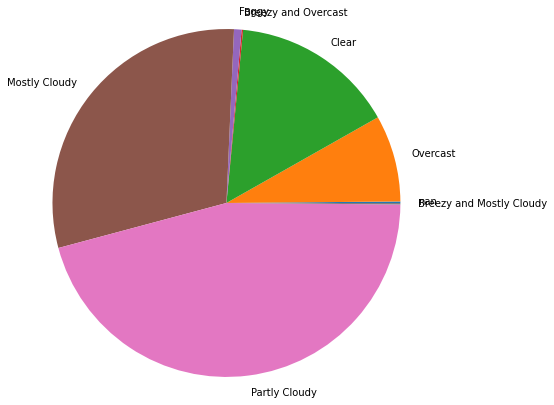

In [9]:
dfa=pd.read_csv('weatherHistory.csv')
dfa=dfa.interpolate()
for i in df['Summary']:
    if i=='nan' or i=='NaN' or i==0:
        df.dropna(i)

daily_summary_list=[]
for i in df['Summary']:
    daily_summary_list.append(i)
    
daily_summary_set=set(daily_summary_list)

summaries=[i for i in daily_summary_set]
slices=[daily_summary_list.count(i) for i in daily_summary_set]

#pie chart
plt.pie(slices,labels=list(daily_summary_set),radius=2)
plt.show()

**Boxplot**

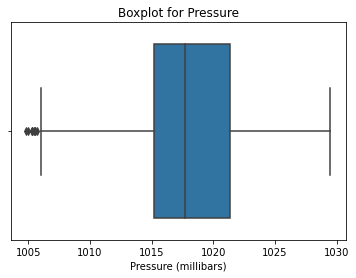

In [10]:
# We plot a boxplot to check the nature of the data in the column pressure
dfa1=pd.read_csv('weatherHistory.csv')
dfa1=dfa1['Pressure (millibars)'].interpolate()

# First and third quartiles
Q1,Q3=dfa1.quantile([0.25,0.75])

# Median
Median=dfa1.median()

# Inter-Quartile range
IQR=Q3-Q1

# we construct a boxplot now
sns.boxplot(dfa1)
plt.title('Boxplot for Pressure')
plt.show()

We notice that there are quite a few outliers on the left side in the box plot.  
Therefore it's essential for us to drop them for better visualization

In [11]:
print('No. of observations before eliminating the outliers:',len(dfa1))
init_dfa_len=len(dfa1)

# Removal of outliers
dfa1=dfa1[dfa1.between(Q1-1.5*IQR,Q3+1.5*IQR)]

print('No. of observations after eliminating the outliers:',len(dfa1))
final_dfa_len=len(dfa1)

print('Therefore we have found ', init_dfa_len-final_dfa_len ,' outliers')

No. of observations before eliminating the outliers: 720
No. of observations after eliminating the outliers: 711
Therefore we have found  9  outliers


Now let's plot a histogram for the renewed dataset and check the nature of the distribution

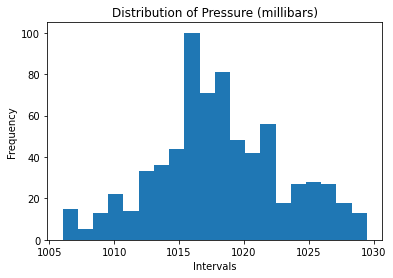

In [12]:
plt.hist(dfa1,bins=20)
plt.title('Distribution of Pressure (millibars)')
plt.xlabel('Intervals')
plt.ylabel('Frequency')

# Adding a best fit line to further emphasize the nature of the curve
mu=dfa1.mean()
sigma=math.sqrt(dfa1.var())

plt.show()

By observing the above histogram, we can conclude that the above data is approximately normally distributed, since we obtain a bell curve

## b. Implementation of graph visualization techniques (any 3) (most suitable)
**Bar chart**

                                      no. of hours for each summary category (in a month)

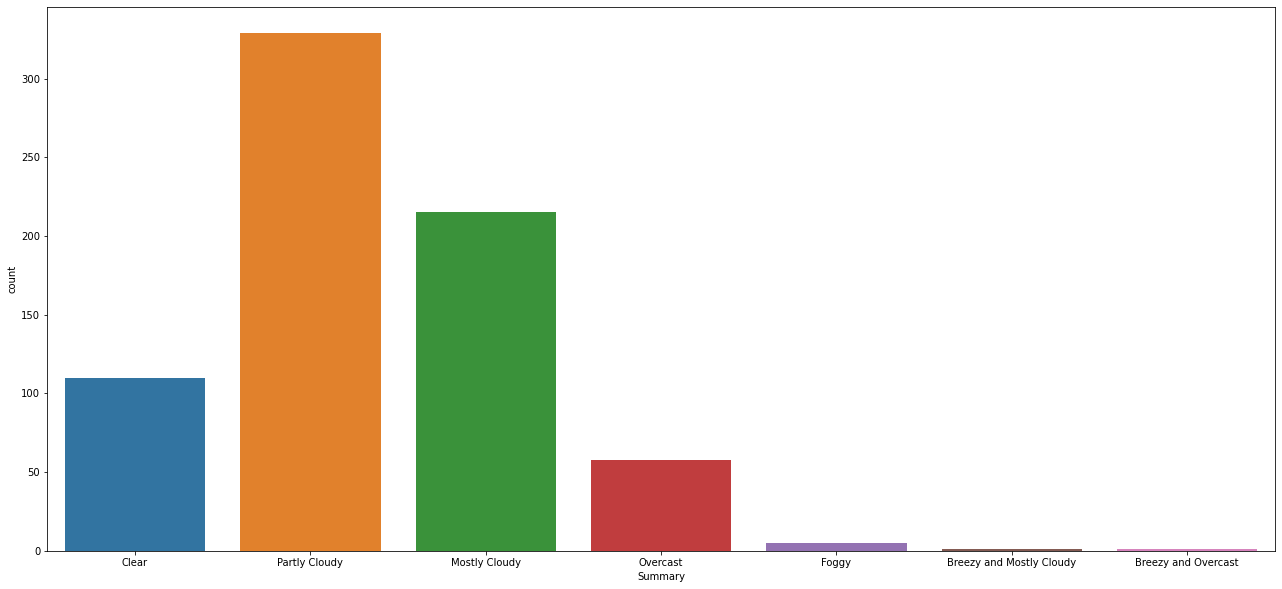

In [13]:
printmd('                                      no. of hours for each summary category (in a month)')

plt.figure(figsize = (22,10))
sns.countplot(df["Summary"])
plt.show()

 **Most of the days are partly cloudy**   

                                               effect of weather on wind speed

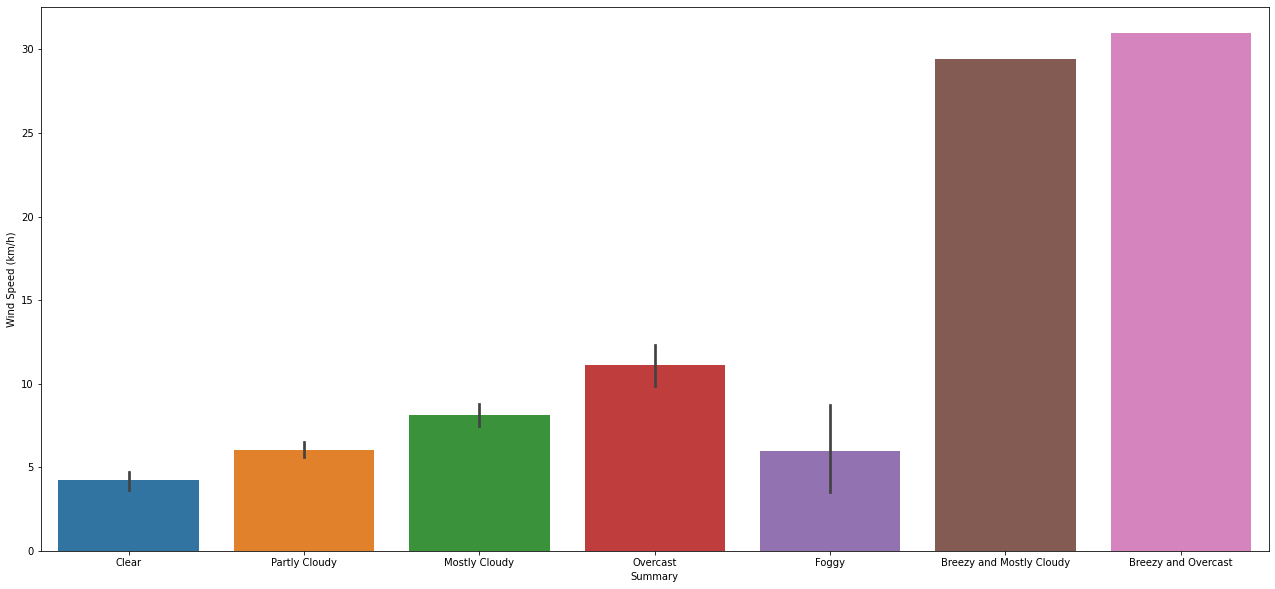

In [14]:
printmd('                                               effect of weather on wind speed')
plt.figure(figsize = (22,10))
sns.barplot(x = df["Summary"],y = df["Wind Speed (km/h)"])
plt.show()

                                                  effect of weather on temperature

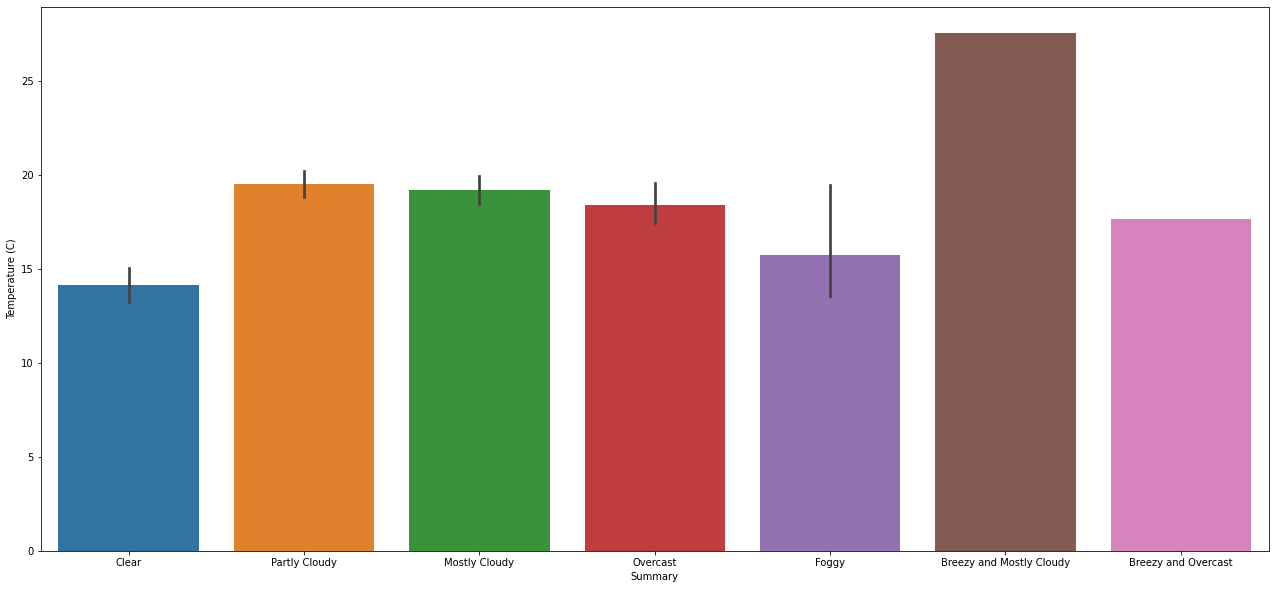

In [15]:
printmd('                                                  effect of weather on temperature')
plt.figure(figsize = (22,10))
sns.barplot(x = df["Summary"],y = df["Temperature (C)"])
plt.show()

                                             effect of weather on visibility

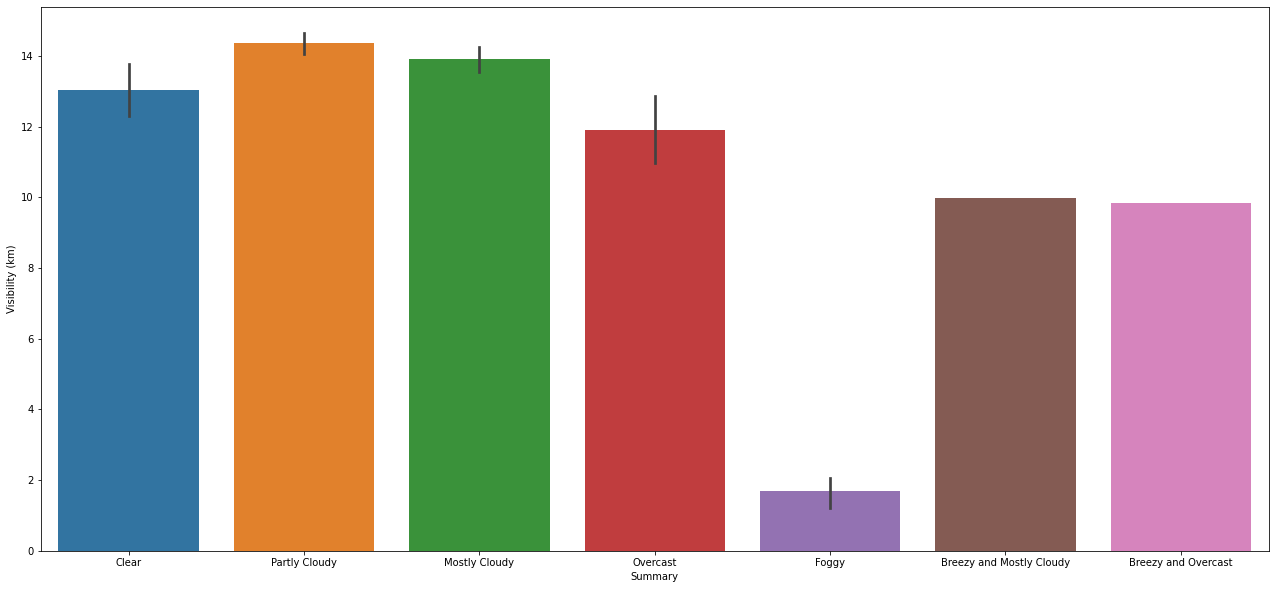

In [16]:
printmd('                                             effect of weather on visibility')
plt.figure(figsize = (22,10))
sns.barplot(x = df["Summary"],y = df["Visibility (km)"])
plt.show()

                                               effect of weather on humidity

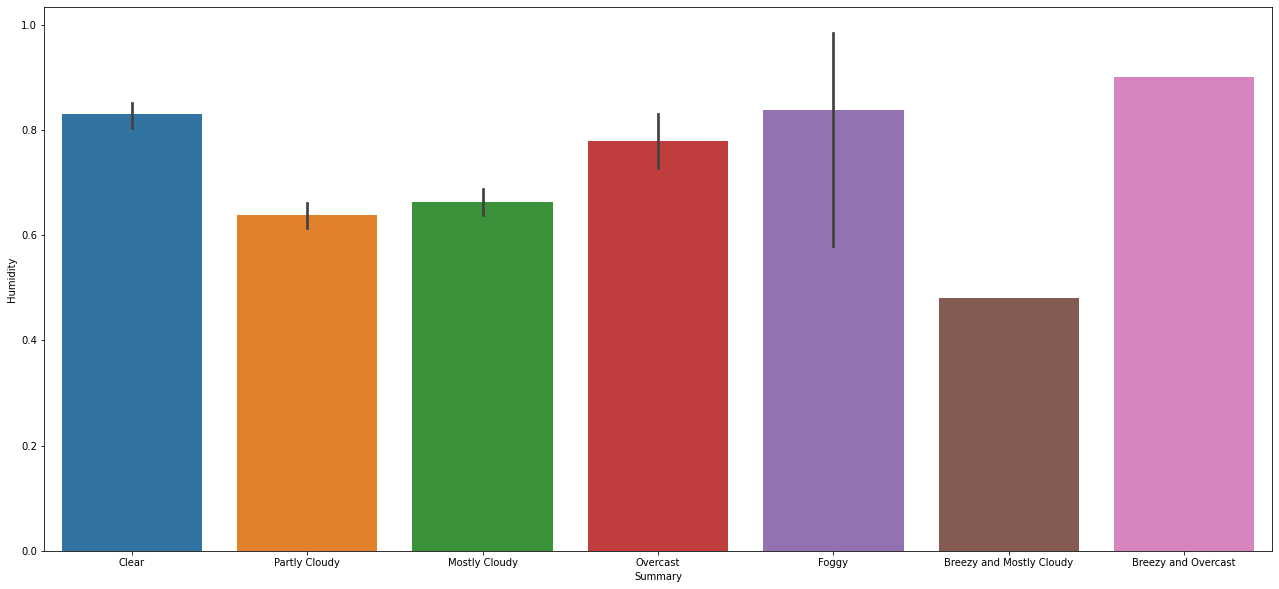

In [17]:
printmd('                                               effect of weather on humidity')

plt.figure(figsize = (22,10))
sns.barplot(x = df["Summary"],y = df["Humidity"])
plt.show()

**Count of daily weather summaries**

#### References

**Part-1**:

* **Pc** = Partly Cloudy
* **Mc** = Mostly Cloudy
* **F** = Foggy
* **O** = Overcast


**Part-2**:

* **sitm** = starting in the morning
* **sita** = starting in the afternoon
* **cun** = continuing till noon
* **cue** = continuing till evening

**Part-3**:

* **ttd** = throughout the day
* **so** = starting overnight
* **o** = overnight

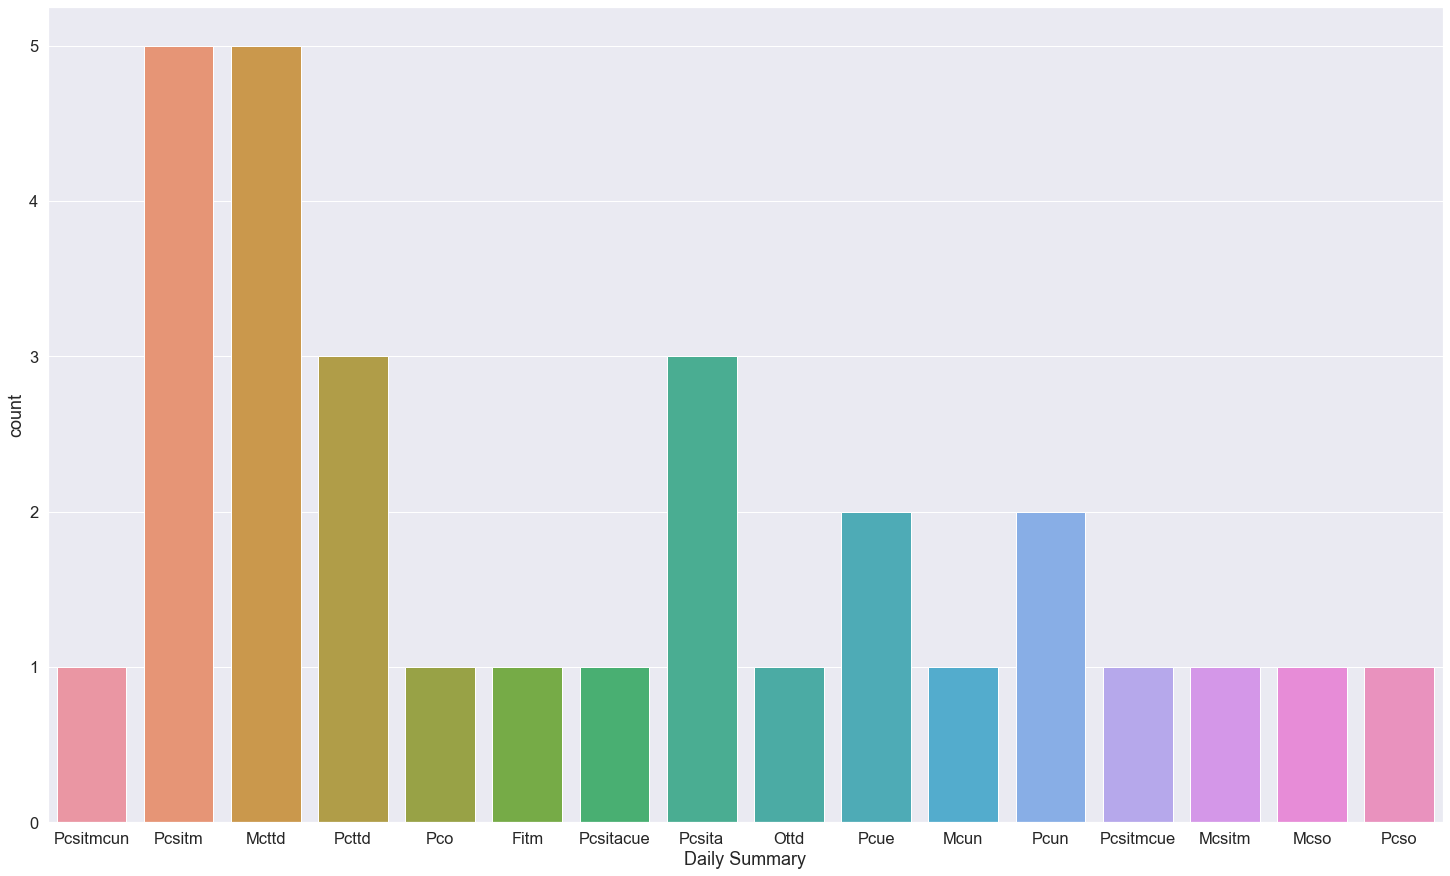

In [18]:
#count of daily weather summaries
days = [i for i in range(0,719,24)]
data_with_one_hour_per_day = df.iloc[days,:]

def shorten(text):
    if(text == 'NaN'):
        return text
    return("".join([i[0] for i in text.split(" ")]))

data_with_one_hour_per_day_1=data_with_one_hour_per_day["Daily Summary"].apply(shorten)

sns.set(font_scale = 1.5)

plt.figure(figsize = (25,15))
p = sns.countplot(data_with_one_hour_per_day_1)

printmd('**Count of daily weather summaries**')
printmd('#### References')
printmd('**Part-1**:')
printmd('* **Pc** = Partly Cloudy\n* **Mc** = Mostly Cloudy\n* **F** = Foggy\n* **O** = Overcast\n')
printmd('**Part-2**:')
printmd('* **sitm** = starting in the morning\n* **sita** = starting in the afternoon\n* **cun** = continuing till noon\n* **cue** = continuing till evening')
printmd("**Part-3**:")
printmd('* **ttd** = throughout the day\n* **so** = starting overnight\n* **o** = overnight')

## c. Filtering of unwanted outliers

### i. Via numerical methods (box plot/histogram)

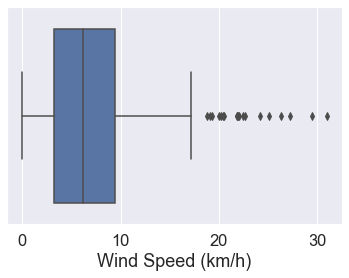

In [19]:
df1=df['Wind Speed (km/h)'].interpolate()
sns.boxplot(df1)
plt.show()

In [20]:
# therefore we must remove quite a few outliers since there are a lot of them present

Q1,Q3=df1.quantile([0.25,0.75])
Median=df1.median()

IQR=Q3-Q1

print('No. of observations before eliminating the outliers:',len(df1))
init_dfa_len=len(df1)

# Removal of outliers
df1=df1[df1.between(Q1-1.5*IQR,Q3+1.5*IQR)]

print('No. of observations after eliminating the outliers:',len(df1))
final_dfa_len=len(df1)

print('Therefore we have found ', init_dfa_len-final_dfa_len ,' outliers')

No. of observations before eliminating the outliers: 720
No. of observations after eliminating the outliers: 701
Therefore we have found  19  outliers


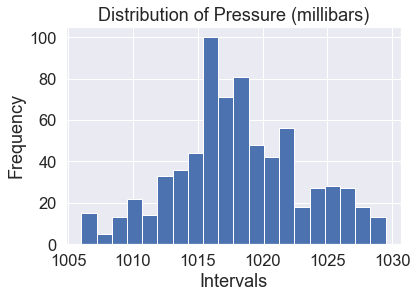

In [21]:
plt.hist(dfa1,bins=20)
plt.title('Distribution of Pressure (millibars)')
plt.xlabel('Intervals')
plt.ylabel('Frequency')
plt.show()

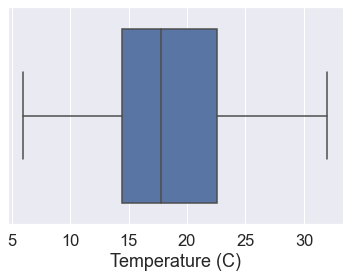

In [22]:
df1=df['Temperature (C)'].interpolate()
sns.boxplot(df1)

# we don't observe outliers in this case

plt.show()

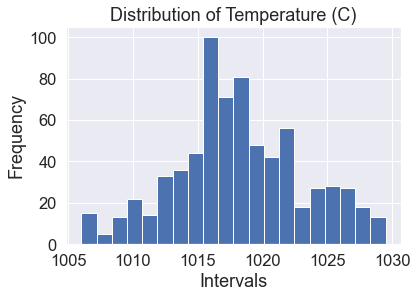

In [23]:
plt.hist(dfa1,bins=20)
plt.title('Distribution of Temperature (C)')
plt.xlabel('Intervals')
plt.ylabel('Frequency')
plt.show()

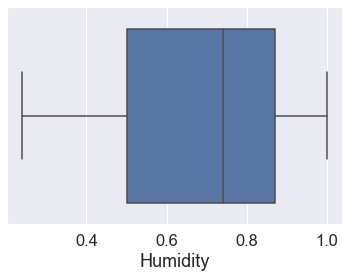

In [24]:
df1=df['Humidity'].interpolate()
sns.boxplot(df1)

# we don't observe any outliers in this case either

plt.show()

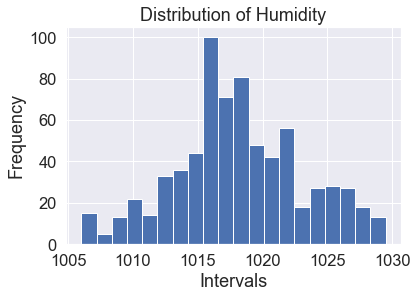

In [25]:
plt.hist(dfa1,bins=20)
plt.title('Distribution of Humidity')
plt.xlabel('Intervals')
plt.ylabel('Frequency')
plt.show()

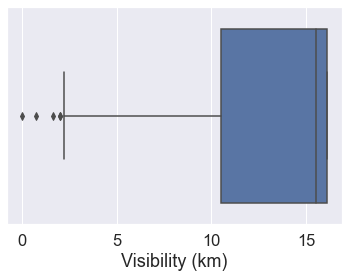

In [26]:
df1=df['Visibility (km)'].interpolate()
sns.boxplot(df1)
plt.show()

In [27]:
# therefore we must remove outliers since few of them are present

Q1,Q3=df1.quantile([0.25,0.75])
Median=df1.median()

IQR=Q3-Q1

print('No. of observations before eliminating the outliers:',len(df1))
init_dfa_len=len(df1)

# Removal of outliers
df1=df1[df1.between(Q1-1.5*IQR,Q3+1.5*IQR)]

print('No. of observations after eliminating the outliers:',len(df1))
final_dfa_len=len(df1)

print('Therefore we have found ', init_dfa_len-final_dfa_len ,' outliers')

No. of observations before eliminating the outliers: 720
No. of observations after eliminating the outliers: 715
Therefore we have found  5  outliers


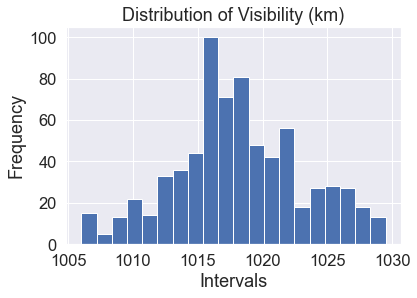

In [28]:
plt.hist(dfa1,bins=20)
plt.title('Distribution of Visibility (km)')
plt.xlabel('Intervals')
plt.ylabel('Frequency')
plt.show()

### ii. Categorical (bar chart)

                                      no. of hours for each summary category (in a month)

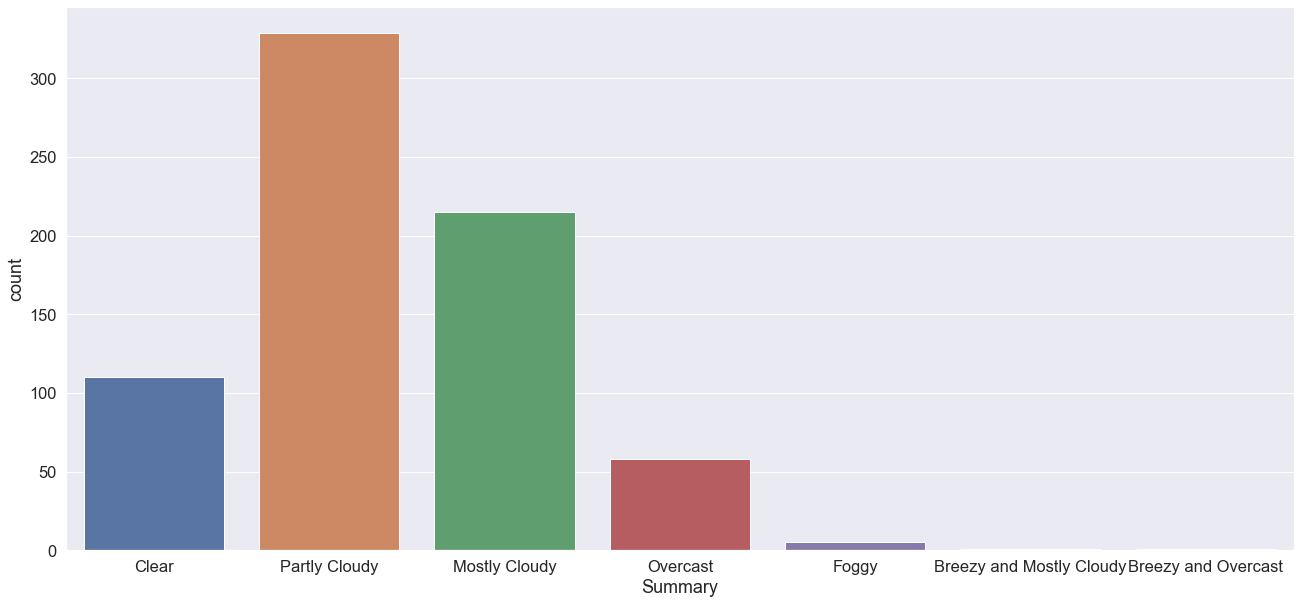

In [29]:
printmd('                                      no. of hours for each summary category (in a month)')

plt.figure(figsize = (22,10))
sns.countplot(df["Summary"])
plt.show()

With help of the above bar chart, we discover that foggy, breezy and mostly cloudy, breezy and overcast are potential outliers.
But since they are categorical variables and related to weather, it's quite plausible that these outliers must be a part of the dataset.  
Therefore, we don't remove outliers in this case.  

# 3. Normalization and standardization

## a. Mean and standard deviation for each of the columns

In [30]:
df=pd.read_csv('weatherHistory.csv').interpolate()
df_mu = pd.DataFrame(df.mean(), columns = ["Mean"])
df_sigma = pd.DataFrame(df.std(), columns = ['Standard Deviation'])
df_mean_sd = pd.concat([df_mu, df_sigma], axis=1, sort=False)
df_mean_sd

,Mean,Standard Deviation
Temperature (C),18.477697,6.106512
Apparent Temperature (C),18.367924,5.990054
Humidity,0.688118,0.212725
Wind Speed (km/h),6.853256,4.765434
Wind Bearing (degrees),177.380556,124.146086
Visibility (km),13.740187,3.295867
Loud Cover,0.000000,0.000000
Pressure (millibars),1017.981389,5.148483


## b. Standardization of all the numeric columns (to make mean 0 and variance 1)

In [47]:
# using the concept of z-score
df=pd.read_csv('weatherHistory.csv').interpolate()
normalized_df = df

new_list = df.select_dtypes(include=np.number).columns.to_list() #List of numeric columns

for e in new_list :
        normalized_df[e] = (normalized_df[e] - normalized_df[e].mean())/normalized_df[e].std()
        # using the formula for z-score: z=(x-mu)/sigma
        
#Since the resulting dataset has a column, whose values do not change, we can drop it.
normalized_df = normalized_df.drop(columns = 'Loud Cover')

#Normalized_df is the normalised dataset
normalized_df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2016-09-01 00:00:00.000 +0200,Clear,rain,-0.349341,-0.337807,-0.414234,-0.147532,-1.106604,0.715991,0.811620,Partly cloudy starting in the morning continui...
1,2016-09-01 01:00:00.000 +0200,Clear,rain,-0.440318,-0.430553,-0.320216,-0.157668,-0.873008,0.715991,0.790254,Partly cloudy starting in the morning continui...
2,2016-09-01 02:00:00.000 +0200,Clear,rain,-0.840619,-0.838637,0.196883,-0.755662,-0.977724,0.437552,0.751408,Partly cloudy starting in the morning continui...
3,2016-09-01 03:00:00.000 +0200,Clear,rain,-0.960710,-0.961062,0.290901,-0.762419,-1.267705,0.715991,0.749466,Partly cloudy starting in the morning continui...
4,2016-09-01 04:00:00.000 +0200,Clear,rain,-1.054417,-1.056591,0.431927,-1.438118,-1.428805,0.715991,0.749466,Partly cloudy starting in the morning continui...
...,...,...,...,...,...,...,...,...,...,...,...
715,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,1.234579,1.276907,-1.213386,0.869395,-1.179099,0.715991,-0.703390,Partly cloudy starting in the morning.
716,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,0.999857,1.037621,-0.978341,0.680199,-1.267705,0.549905,-0.548004,Partly cloudy starting in the morning.
717,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,0.583179,0.612843,-0.602269,0.447083,-1.187154,0.715991,-0.450888,Partly cloudy starting in the morning.
718,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,0.498570,0.526589,-0.414234,0.771419,-1.267705,0.715991,-0.394561,Partly cloudy starting in the morning.


In [54]:
df1 = pd.DataFrame(normalized_df.mean(), columns = ["Mean"]).round(10) #Mean rounded off to 10 decimal places

df2 = pd.DataFrame(normalized_df.var(), columns = ["Variance"]) #Variance
df3 = pd.concat([df1, df2], axis=1, sort=False)

df3

,Mean,Variance
Temperature (C),-0.0,1.0
Apparent Temperature (C),-0.0,1.0
Humidity,-0.0,1.0
Wind Speed (km/h),-0.0,1.0
Wind Bearing (degrees),0.0,1.0
Visibility (km),-0.0,1.0
Pressure (millibars),-0.0,1.0


**Since the mean is 0 and standard deviation is 1 for all the numerical columns in the dataset, we can conclude that the data is standardized**  

## c. Reasons for the neccessity of normalization and the ways in which it affects datasets

### Why should data be normalized and standardized :
So that we can bring all the values to a common  without much distortion

### How does normalization affect datasets :
* Gets rid of the anomalies and the outliers which in turn plays a crucial role in inferential statistics

## d. Verification of the normality of data 

We verify the normality of the data by plotting a histogram, but before that we need to eliminate outliers for optimum results

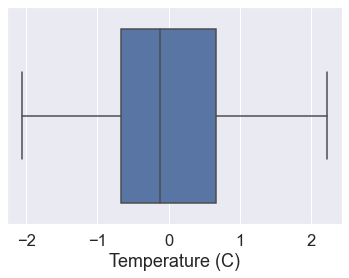

In [32]:
sns.boxplot(normalized_df['Temperature (C)'])
plt.show()

Since we don't observe outliers for temperature, we can proceed to construct the histogram

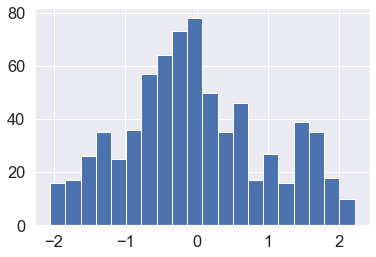

In [33]:
plt.hist(normalized_df['Temperature (C)'],bins=20)
plt.show()

As we can see, the data is approximately normally distributed, so this is the verification for the test of the normality for the temperature.  
Since temperature is normally distributed, apparent temperature is also normally distributed

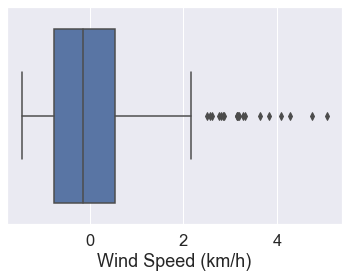

In [34]:
sns.boxplot(normalized_df['Wind Speed (km/h)'])
plt.show()

Since, we observe a lot of outliers, we need to remove them

In [35]:
Q1,Q3=normalized_df['Wind Speed (km/h)'].quantile([0.25,0.75])

IQR=Q3-Q1

print('No. of observations before eliminating the outliers:',len(normalized_df['Wind Speed (km/h)']))
init_dfa_len=len(normalized_df['Wind Speed (km/h)'])

# Removal of outliers
df1=[]
for i in normalized_df['Wind Speed (km/h)']:
    if (Q1 - 1.5*IQR < i < Q3+1.5*IQR):
        df1.append(i)

print('No. of observations after eliminating the outliers:',len(df1))
final_dfa_len=len(df1)

print('Therefore we have found ', init_dfa_len-final_dfa_len ,' outliers')

No. of observations before eliminating the outliers: 720
No. of observations after eliminating the outliers: 701
Therefore we have found  19  outliers


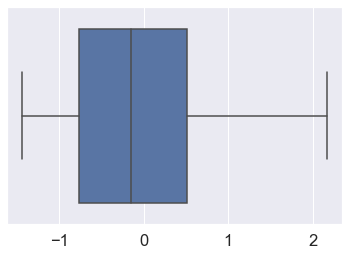

In [36]:
df1=pd.DataFrame(df1)
sns.boxplot(df1)
plt.show()

Now, this data is said to be normally distributed since the median is approximately at the middle of other box

# 4. Hypothesis testing

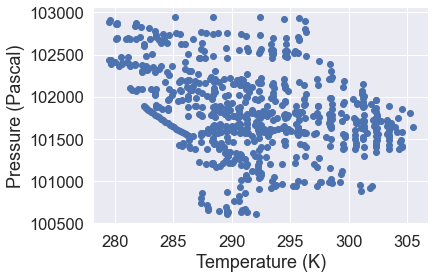

In [37]:
df4=pd.read_csv('weatherHistory.csv')
df4=df4.interpolate()
df_temp_list=df4['Temperature (C)']
df_pressure_list=df4['Pressure (millibars)']

# we have observed that there are outliers for pressure while not for temperature, so, it's better to drop those outliers and then
# carry out the multiplication else the results would be impacted severely

Q1,Q3=df_pressure_list.quantile([0.25,0.75])
Median=df_pressure_list.median()

IQR=Q3-Q1

# auxillary list, to keep hold of the indexes of the non-outliers, since there are 2 variables and they have different no. of outliers
# Since we are handling multiple variables, we must maintain the same no. of occurrences for both the variables so that they can form appropriate pairs
# The mentioned procedure is necessary since we are carrying out division for which we require proper pairs of variables

l=[]

# adding indexes 
for i in range(len(df_pressure_list)):
    if Q1-1.5*IQR<df_pressure_list[i]<Q3+1.5*IQR:
        l.append(i)
        
df_temp_list_1=[]
df_pressure_list_1=[]

for i in l:
    df_temp_list_1.append(df_temp_list[i])
    df_pressure_list_1.append(df_pressure_list[i])
    
df_temp_list=df_temp_list_1
df_pressure_list=df_pressure_list_1    

# converting temperature in celsius to kelvin
for i in range(len(df_temp_list)):
    df_temp_list[i]+=273.5

# converting pressure in millibar first to bar, then to pascal
for i in range(len(df_pressure_list)):
    df_pressure_list[i]*=100         # dividing by 1000 initially and then multiplying by 100000
    
plt.scatter(df_temp_list,df_pressure_list)
plt.xlabel('Temperature (K)')
plt.ylabel('Pressure (Pascal)')
plt.show()

## a. Research hypothesis

We know that for a closed system, temperature is directly proportional to pressure.

But the graph for the sample dataset as shown above doesn't seem to depict it. It rather approximates an inverse relationship between pressure and temperature.

### Can we prove that the sample is a subset of the population?

The general assumption here is that the temperature and pressure are directly related

### Therefore:
**H0**: Sample is subset of the population<br/>  
**H1**: Sample is not a subset of the population  

## b. Statistical tests

H0: **T α P** is **True** for the sample i.e. Sample is subset of the population<br/>  
H1: **T α P** is **False** for the sample i.e. Sample is not a subset of the population  

Since the sample size is appreciably large enough, we can approximate it to a sample from a normal distribution. Also, since the standard deviation is also known, it's safe to say that we can use the z-table in order to perform the statistical tests.

Since the general belief is that temperature and pressure are directly related to each other, i.e. **(T α P)**

Therefore, the following equation would be true:

**(T = kP)** (where k is an arbitrary constant)

**T/P = k**

Therefore, we have to ensure that the value of k remains as constant as possible with minimum possible deviation and negligible error. It's also crucial to avoid any possible bias in order to ensure proper results.

## c. Hypothesis based on columns of our choice

Since the columns chosen are temperature and pressure, we find out their product and note down the observations.

In [38]:
l=[df_temp_list,df_pressure_list]
print(l)

[[289.84444444, 289.28888889, 286.84444444, 286.11111111, 285.53888889, 285.62222222, 285.49444444, 288.16111111, 290.96111111, 294.49444444, 297.31666667, 298.45, 299.58333333, 301.20555556, 301.16111111, 301.27777778, 302.29444444, 301.21666667, 300.67222222, 297.36111111, 293.66111111, 291.20555556, 290.58333333, 289.68888889, 291.29444444, 290.74444444, 290.80555556, 290.1, 290.10555555999997, 290.17777778, 289.54444444, 290.58888889, 292.25555556, 295.63333333, 298.45, 301.04444444, 302.41111111, 304.53888889, 303.35, 302.48333333, 302.43888889, 301.25, 301.23333333, 298.45, 296.98888889, 296.02777778, 294.86666667, 294.80555556, 294.28888889, 292.78333333, 292.4, 292.78888889, 293.22777778, 292.52222222, 293.25, 293.3, 294.43333333, 298.36111111, 300.62777778, 302.04444444, 302.48333333, 302.50555556, 303.65, 303.63888889, 305.5, 303.92777778, 302.16111111, 298.36111111, 297.47777778, 294.53888889, 293.40555556, 292.63333333, 291.71666667, 290.65, 290.52777778, 289.63888889, 289.

For simplicity, let's take the value of k as 1

In [39]:
k=1    # const. equated to 1 for simplification
k_val=[k*l[0][i]/l[1][i] for i in range(len(df_temp_list))]
print(k_val)

[0.0028356073847538546, 0.0028304768738320043, 0.002807109110339091, 0.0027999599850270103, 0.0027943600650786817, 0.002794929420018984, 0.0027941438737081113, 0.002819469992466048, 0.002847116895249278, 0.0028814375605651444, 0.0029087665747353593, 0.00291985442307316, 0.002931831452687825, 0.002948630513259782, 0.002950448317478667, 0.0029536168326421775, 0.0029647755481453874, 0.002955306568325419, 0.0029500517284955993, 0.002918395076257214, 0.002880583757025847, 0.0028551243755515028, 0.0028481860476946602, 0.002839419047381008, 0.002866337791903647, 0.0028612073338844276, 0.0028620903840324394, 0.002855371168723794, 0.002855453955923895, 0.002856727190013487, 0.0028499590972085515, 0.002859141918532002, 0.002875512176394191, 0.002908488694279109, 0.0029359395596828455, 0.0029621612165699105, 0.002975813655471694, 0.002997990656618856, 0.0029867278419943685, 0.0029784294031981722, 0.002979106470547675, 0.002967395587076438, 0.0029677868526418456, 0.0029405968884553615, 0.002924500

In [40]:
df5=pd.DataFrame(k_val)
mu=df5.mean()
sigma=math.sqrt(df5.var())
print('Mean: ', mu)
print('Standard Deviation: ', sigma) 

Mean:  0    0.002868
dtype: float64
Standard Deviation:  6.60409945795279e-05


We know that the average of the ratio of standard temperature(273.15 K) and standard pressure(10,000 bar) is a constant i.e. 0.0027315 

Using z-score to standardize the data:
We obtained the mean of the ratio as 0.002868
We obtained the standard deviation of the ratio as 6.569896069161947e-05

Therefore,

**x = 0.002868    
μ = 0.0027315  
σ = 6.569896069161947e-05**

Therefore, the z-score is as follows:

**z = ( x - μ ) / σ**

In [41]:
x=mu
mu=0.0027315
z_score=(x-mu)/sigma
print(z_score)

0    2.067425
dtype: float64


In [42]:
# multiplication by 2 since it's 2-sided distribution
# since it's either equal to or not equal to the constant
# therefore, the P-value is the sum of the 2 areas on the extreme ends of the distribution
p_value = stats.norm.sf(abs(z_score))*2
print('P-Value: ',end='')
for i in p_value:
    print(i)

P-Value: 0.038694142721681285


## d. Decision on whether the null hypothesis is supported or rejected

### 5% statistical significance
Since P-Value is less than 0.05, (taking at 5% statistical significance), we reject H0, the original hypothesis, and accept our claim that the chosen sample is not a subset of the population.
_______________________________________________________________________________________________________________________________
    
   But, we know that pressure is directly proportional to temperature only at constant volume. We also know that the volume doesn't always remain constant. The change in volume to most extent would be practically significant. But the changes at times are definitely statistically significant. That's the main reason why we the null hypothesis was rejected by taking 5% statistical significance.

   Therefore, a better solution is to increase the level of accuracy and bring the level of statistical significance down to 1%, which obviously seems to be a better choice in this scenario.
_______________________________________________________________________________________________________________________________

### 1% statistical significance
So, since P-value is greater than 0.01, (taking at 1% statistical significance), we do not reject H0, so the hypothesis that the sample is a subset of the population is plausible to some extent.

### Therefore, we can confidently conclude that the null hypothesis is supported.

Backup hypothesis testing:  
H0: Sample is representative of the population  
H1: Sample is not representative of the population

So, in order to prove that the sample is representative of the population, we have to prove that the mean and standard devaition of the sample and the population are roughly equal  

# 5. Correlation

## a. Correlation b/w variables that are positively and negatively related

In [43]:
df=pd.read_csv('weatherHistory.csv').drop(columns='Loud Cover')
df=df.interpolate()

**Correlation Table**

In [44]:
correlation_df=df.corr()
correlation_df

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
Temperature (C),1.000000,0.998718,-0.820016,0.310708,-0.102308,0.147323,-0.299430
Apparent Temperature (C),0.998718,1.000000,-0.813411,0.304023,-0.105036,0.143475,-0.304001
Humidity,-0.820016,-0.813411,1.000000,-0.257865,0.074471,-0.302731,-0.083958
Wind Speed (km/h),0.310708,0.304023,-0.257865,1.000000,0.049136,-0.162688,-0.319504
Wind Bearing (degrees),-0.102308,-0.105036,0.074471,0.049136,1.000000,-0.038022,-0.050841
Visibility (km),0.147323,0.143475,-0.302731,-0.162688,-0.038022,1.000000,0.205806
Pressure (millibars),-0.299430,-0.304001,-0.083958,-0.319504,-0.050841,0.205806,1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

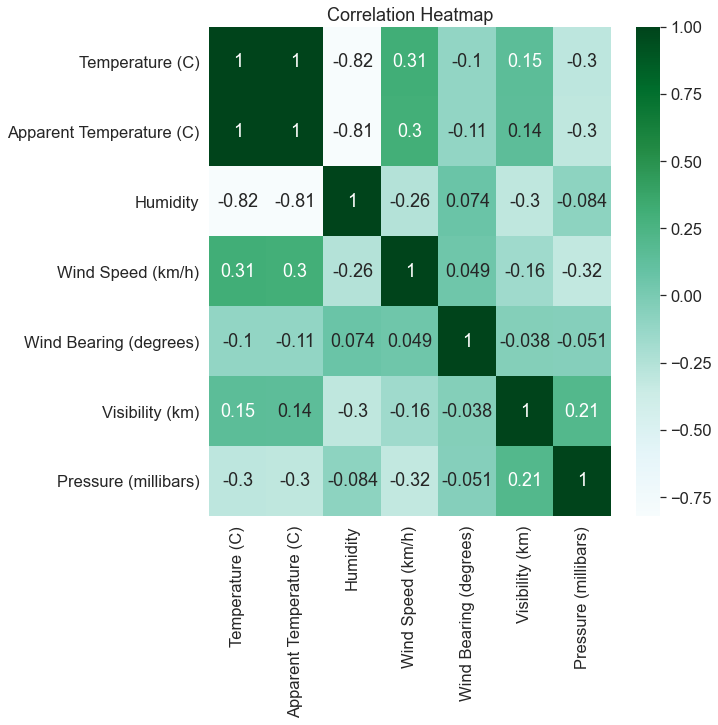

In [45]:
fig = plt.figure(figsize=(9,9))
r = sns.heatmap(correlation_df,annot=True,cmap='BuGn')
r.set_title("Correlation Heatmap")

**With the help of the above tabular and graphical data, we can state the correlation between the variables that are positively and negatively correlated.**

## b. Inferences

**With the assistance of data and results proved above, we obtain various inferences on the nature of the dataset as mentioned below:**

- Most of the days were rainy and cloudy in nature since the observations in the dataset have been from the month of September, during which monsoon/rainy season is prevalent in most parts of the Northern Hemisphere in and around the Tropic of Cancer.

- We can also easily infer and predict the weather in the forthcoming couple of months, using the given statistics to find the parameters. 

- We can also predict the weather in the similar months in the upcoming few years, but at the same time, we would also need to take into account the rising rate of various environmental effects like greenhouse effect leading to global warming thereby leading to imbalanced seasons which result in excess droughts and floods. The average temperature of the earth is also rising slowly but steadily.

- So, it wouldn't be wrong to say that the inferences and predictions made in the future i.e. after 5 years and more... wouldn't be plausible as they are for the near future, thereby leading to an increase in the degree of uncertainty and many more assumptions and null hypotheses being rejected. 

- But, we can predict the weather to some extent in general even in the upcoming years, just that the degree of uncertainty would be witnessing an exponential rise, which isn't of any help to the statisticians even by the slightest of means.

- So, take care of the environment as well :)

_______________________________________________________________________________________________________________________________
###                                                                        THE END                                       